In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime # Install the missing dependency

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PIL import Image
from rembg import remove
from io import BytesIO
import matplotlib.pyplot as plt

# Create directories for saving images
os.makedirs('original', exist_ok=True)
os.makedirs('output', exist_ok=True)




100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 110GB/s]


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7d49d8a50ae0>

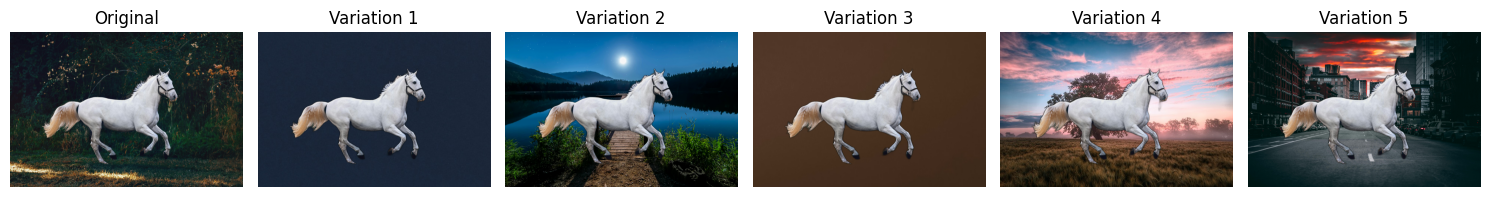

In [ ]:
# Function to download an image
# Function to download an image
def download_image(url):
    try:
        response = requests.get(url, stream=True)  # Stream the response
        response.raise_for_status()  # Raise an HTTPError for bad responses
        return Image.open(BytesIO(response.content))
    except Exception as e:
        print(f"Error downloading image from {url}: {e}")
        return None  # Return None if the image cannot be downloaded


# Input image
img_url = 'https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg?cs=srgb&dl=pexels-wildlittlethingsphoto-1996333.jpg&fm=jpg'
img_name = img_url.split('/')[-1]
input_image = download_image(img_url)
input_image.save(f'original/{img_name}', format='jpeg')

# Background removal
input_path = f'original/{img_name}'
output_path = f'output/removed_{img_name}'

with open(input_path, 'rb') as f:
    input_data = f.read()
output_data = remove(input_data)  # Rembg function to remove background
with open(output_path, 'wb') as f:
    f.write(output_data)

# Load the foreground image (with background removed)
foreground = Image.open(output_path).convert("RGBA")

# Backgrounds for variations
background_urls = [
    'https://img.freepik.com/free-photo/design-space-paper-textured-background_53876-32191.jpg',
    'https://images.pexels.com/photos/414612/pexels-photo-414612.jpeg?cs=srgb&dl=pexels-pixabay-414612.jpg&fm=jpg',
    'https://img.freepik.com/free-photo/brown-gradient-background_53876-104923.jpg',
    'https://cdn.pixabay.com/photo/2021/08/25/20/42/field-6574455_640.jpg',
    'https://images.pexels.com/photos/1034662/pexels-photo-1034662.jpeg?cs=srgb&dl=pexels-pixabay-1034662.jpg&fm=jpg'
]

# ... previous code ...
# Generate multiple variations and store them
composite_images = [input_image]  # Start with the original image
for i, bg_url in enumerate(background_urls):
    background = download_image(bg_url)
    if background is not None: # Check if download was successful
        background = background.convert("RGBA")
        background = background.resize(foreground.size)

        # Composite the images
        composite = background.copy()
        composite.paste(foreground, (0, 0), foreground)

        # Convert to RGB before saving as JPEG
        composite = composite.convert("RGB") # convert the image to RGB

        # Save the output
        output_filename = f'output/variation_{i+1}.jpeg'
        composite.save(output_filename, format='jpeg')
        composite_images.append(composite)
    else:
        print(f"Skipping invalid background URL: {bg_url}")

# Display all images side by side
fig, axs = plt.subplots(1, len(composite_images), figsize=(15, 5))
titles = ['Original'] + [f'Variation {i+1}' for i in range(len(background_urls))]

for ax, img, title in zip(axs, composite_images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
